## NewsAPI

In [1]:
import pandas as pd
import newspaper
from newspaper import Article
import time
import requests
from datetime import datetime, timedelta

In [2]:
API_KEY = '313dd280910e4949b7fb46bf189aeabf'
BASE_URL = "https://newsapi.org/v2/everything"
QUERY = "AI jobs OR AI employment OR AI hiring OR AI workforce"

start_date = datetime(2025, 1, 17)
end_date = datetime(2025, 2, 16)

all_articles = []

current_date = start_date
api_limit_reached = False  

while current_date <= end_date and not api_limit_reached:
    print(f"Fetching articles for {current_date.strftime('%Y-%m-%d')}...")

    for page in range(1, 6):  
        params = {
            "q": QUERY,
            "from": current_date.strftime("%Y-%m-%d"),
            "to": current_date.strftime("%Y-%m-%d"),
            "language": "en",
            "sortBy": "relevancy",
            "pageSize": 20, 
            "page": page,
            "apiKey": API_KEY
        }

        response = requests.get(BASE_URL, params=params)
        
        if response.status_code == 200:
            data = response.json()
            articles = data.get("articles", [])
            
            if not articles:
                print(f"No more articles for {current_date.strftime('%Y-%m-%d')} on page {page}.")
                break  
            
            all_articles.extend(articles)
            print(f"Collected {len(articles)} articles from page {page}.")
        
        elif response.status_code == 426:  # API limit reached
            print("API limit reached. Stopping data collection.")
            api_limit_reached = True
            break
        
        else:
            print(f"Error: {response.status_code}, {response.text}")
            api_limit_reached = True 
            break  

        time.sleep(1) 
    
    current_date += timedelta(days=1)

df_newsapi = pd.DataFrame(all_articles)
print(f"Total articles collected: {len(df_newsapi)}")

Fetching articles for 2025-01-17...
Collected 20 articles from page 1.
Collected 20 articles from page 2.
Collected 20 articles from page 3.
No more articles for 2025-01-17 on page 4.
Fetching articles for 2025-01-18...
Collected 20 articles from page 1.
Collected 2 articles from page 2.
No more articles for 2025-01-18 on page 3.
Fetching articles for 2025-01-19...
Collected 20 articles from page 1.
Collected 1 articles from page 2.
No more articles for 2025-01-19 on page 3.
Fetching articles for 2025-01-20...
Collected 20 articles from page 1.
Collected 19 articles from page 2.
No more articles for 2025-01-20 on page 3.
Fetching articles for 2025-01-21...
Collected 20 articles from page 1.
Collected 19 articles from page 2.
Collected 20 articles from page 3.
Collected 19 articles from page 4.
No more articles for 2025-01-21 on page 5.
Fetching articles for 2025-01-22...
Collected 20 articles from page 1.
Collected 20 articles from page 2.
Collected 20 articles from page 3.
Collected 1

In [3]:
df_newsapi.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Forbes'}","Brent Gleeson, Contributor, \n Brent Gleeson, ...","How Tech, AI, And Leadership Are Shaping The F...",Long regarded as the backbone of industries su...,https://www.forbes.com/sites/brentgleeson/2025...,https://imageio.forbes.com/specials-images/ima...,2025-01-17T00:43:42Z,Black African American Engineer is Testing a F...
1,"{'id': None, 'name': 'Forbes'}","Dr. Chaouki Kasmi, Forbes Councils Member, \n ...",Innovation Management And AI: Embracing Change...,The integration of AI into innovation processe...,https://www.forbes.com/councils/forbestechcoun...,https://imageio.forbes.com/specials-images/ima...,2025-01-17T19:58:15Z,Dr. Chaouki Kasmi is the President of Technolo...
2,"{'id': None, 'name': 'Forbes'}","Steel Rose, CPA, Forbes Staff, \n Steel Rose, ...",Accounting In 2025: 5 Key Issues For CPAs In T...,"AI, Private Equity, Taxes & new CPA pipeline d...",https://www.forbes.com/sites/steelrose/2025/01...,https://imageio.forbes.com/specials-images/ima...,2025-01-17T22:19:33Z,"Mike Federle, then-CEO and current strategic a..."
3,"{'id': None, 'name': 'Forbes'}","Muqsit Ashraf, Contributor, \n Muqsit Ashraf, ...",What Today’s Enterprises Can Learn From A Foun...,Top 25% of companies are growing their product...,https://www.forbes.com/sites/muqsitashraf/2025...,https://imageio.forbes.com/specials-images/ima...,2025-01-17T18:00:10Z,If I asked you when a step change in productiv...
4,"{'id': None, 'name': 'Forbes'}","Steel Rose, CPA, Forbes Staff, \n Steel Rose, ...",America’s Top CPAs Discuss Courageous Integrit...,"AI, Private Equity, Taxes & new CPA pipeline d...",https://www.forbes.com/sites/steelrose/2025/01...,https://imageio.forbes.com/specials-images/ima...,2025-01-17T03:14:20Z,"Mike Federle, CEO, Forbes moderates a panel of..."


In [4]:
df_newsapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       1273 non-null   object
 1   author       1207 non-null   object
 2   title        1273 non-null   object
 3   description  1270 non-null   object
 4   url          1273 non-null   object
 5   urlToImage   1212 non-null   object
 6   publishedAt  1273 non-null   object
 7   content      1273 non-null   object
dtypes: object(8)
memory usage: 79.7+ KB


In [5]:
ai_articles_from_newsapi = pd.DataFrame(columns=["content"])

def extract_article(url):
    """Extracts the full article content from a given URL using newspaper3k."""
    try:
        article = Article(url)
        article.download()
        article.parse()
        print('Succussful to extract article')
        return article.text
        
    except Exception as e:
        print("Failed to extract article")
        return None

article_texts = []
for idx, row in df_newsapi.iterrows():
    url = row["url"]

    full_text = extract_article(url)
    
    if full_text:
        article_texts.append([full_text]) 
    time.sleep(1)  

ai_articles_from_newsapi = pd.DataFrame(article_texts, columns=["content"])

Failed to extract article
Failed to extract article
Failed to extract article
Failed to extract article
Failed to extract article
Succussful to extract article
Failed to extract article
Succussful to extract article
Failed to extract article
Succussful to extract article
Succussful to extract article
Failed to extract article
Failed to extract article
Failed to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Failed to extract article
Succussful to extract article
Failed to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Failed to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Su

In [6]:
ai_articles_from_newsapi.head()

,content
0,"AI to replace millions of jobs by 2030, WEF re..."
1,Imagine a world where robots not only coexist ...
2,"Xie GengHong/Getty Images\n\nThis year, artifi..."
3,"Abu Mirza, global SVP of digital products and ..."
4,The survey further reveals that tech CFOs are ...


In [7]:
ai_articles_from_newsapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  951 non-null    object
dtypes: object(1)
memory usage: 7.6+ KB


## Mediastack

In [8]:
API_KEY = "4385b0fdf041e9f235c51d1e9ae45990"
BASE_URL = "http://api.mediastack.com/v1/news"
QUERY = "AI jobs OR AI employment OR AI hiring OR AI workforce"

start_date = datetime(2025, 1, 17)
end_date = datetime(2025, 2, 16)

all_articles = []
api_limit_reached = False  

def extract_article(url):
    """Extracts the full article content from a given URL using newspaper3k."""
    try:
        article = Article(url)
        article.download()
        article.parse()
        print(f"Successfully extracted article: {url}")
        return article.text
    except Exception as e:
        print(f"Failed to extract article from {url}: {e}")
        return None

current_date = start_date
while current_date <= end_date and not api_limit_reached:
    print(f"Fetching articles for {current_date.strftime('%Y-%m-%d')}...")
    
    for page in range(1, 6):  
        params = {
            "access_key": API_KEY,
            "q": QUERY,
            "from": current_date.strftime("%Y-%m-%d"),
            "to": current_date.strftime("%Y-%m-%d"),
            "languages": "en",
            "sort": "published_desc",
            "limit": 20, 
            "page": page
        }

        response = requests.get(BASE_URL, params=params)

        if response.status_code == 200:
            data = response.json()
            articles = data.get("data", []) 
            
            if articles:
                all_articles.extend(articles)
                print(f"Collected {len(articles)} articles from page {page}.")
            else:
                print(f"No more articles for {current_date.strftime('%Y-%m-%d')} on page {page}.")
                break  
        
        elif response.status_code in [403, 429]: 
            print("API limit reached. Stopping data collection.")
            api_limit_reached = True
            break
        
        else:
            print(f"Error fetching articles: {response.status_code}, {response.text}")
            api_limit_reached = True  
            break  

        time.sleep(1) 

    current_date += timedelta(days=1)

df_mediastack = pd.DataFrame(all_articles)
print(f"Total articles collected: {len(df_mediastack)}")

Fetching articles for 2025-01-17...
Collected 20 articles from page 1.
Collected 20 articles from page 2.
Collected 20 articles from page 3.
Collected 20 articles from page 4.
Collected 20 articles from page 5.
Fetching articles for 2025-01-18...
Collected 20 articles from page 1.
Collected 20 articles from page 2.
Collected 20 articles from page 3.
Collected 20 articles from page 4.
Collected 20 articles from page 5.
Fetching articles for 2025-01-19...
Collected 20 articles from page 1.
Collected 20 articles from page 2.
Collected 20 articles from page 3.
Collected 20 articles from page 4.
Collected 20 articles from page 5.
Fetching articles for 2025-01-20...
Collected 20 articles from page 1.
Collected 20 articles from page 2.
Collected 20 articles from page 3.
Collected 20 articles from page 4.
Collected 20 articles from page 5.
Fetching articles for 2025-01-21...
Collected 20 articles from page 1.
Collected 20 articles from page 2.
Collected 20 articles from page 3.
Collected 20 ar

In [9]:
df_mediastack.head()

,author,title,description,url,source,image,category,language,country,published_at
0,Qamar Bashir,Trump’s War on Institutions,"Macomb, Detroit, Michigan-President Donald Tru...",https://www.pakistantoday.com.pk/2025/02/17/tr...,Pakistan Today,None,general,en,pk,2025-02-16T19:11:59+00:00
1,Timothy Gardner,‘It’s nuts’: Musk’s DOGE purges nuclear weapon...,The National Nuclear Security Administration e...,https://www.theage.com.au/world/north-america/...,The Age,https://static.ffx.io/images/$zoom_0.588333333...,general,en,au,2025-02-16T19:11:47+00:00
2,Timothy Gardner,‘It’s nuts’: Musk’s DOGE purges nuclear weapon...,The National Nuclear Security Administration e...,https://www.brisbanetimes.com.au/world/north-a...,brisbanetimes,https://static.ffx.io/images/$zoom_0.588333333...,general,en,au,2025-02-16T19:11:47+00:00
3,Timothy Gardner,‘It’s nuts’: Musk’s DOGE purges nuclear weapon...,The National Nuclear Security Administration e...,https://www.watoday.com.au/world/north-america...,watoday,https://static.ffx.io/images/$zoom_0.588333333...,general,en,au,2025-02-16T19:11:47+00:00
4,Timothy Gardner,‘It’s nuts’: Musk’s DOGE purges nuclear weapon...,The National Nuclear Security Administration e...,https://www.smh.com.au/world/north-america/it-...,The Sydney Morning Herald,https://static.ffx.io/images/$zoom_0.588333333...,general,en,au,2025-02-16T19:11:47+00:00


In [10]:
df_mediastack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        1604 non-null   object
 1   title         2020 non-null   object
 2   description   2020 non-null   object
 3   url           2020 non-null   object
 4   source        2020 non-null   object
 5   image         1463 non-null   object
 6   category      2020 non-null   object
 7   language      2020 non-null   object
 8   country       2020 non-null   object
 9   published_at  2020 non-null   object
dtypes: object(10)
memory usage: 157.9+ KB


In [11]:
ai_articles_from_mediastack = pd.DataFrame(columns=["content"])

def extract_article(url):
    """Extracts the full article content from a given URL using newspaper3k."""
    try:
        article = Article(url)
        article.download()
        article.parse()
        print('Succussful to extract article')
        return article.text
        
    except Exception as e:
        print("Failed to extract article")
        return None

article_texts = []
for idx, row in df_mediastack.iterrows():
    url = row["url"]

    full_text = extract_article(url)
    
    if full_text:
        article_texts.append([full_text]) 
    time.sleep(1)  

ai_articles_from_mediastack = pd.DataFrame(article_texts, columns=["content"])

Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Failed to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Failed to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Failed to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract article
Succussful to extract 

In [12]:
ai_articles_from_mediastack.head()

,content
0,"Macomb, Detroit, Michigan-President Donald Tru..."
1,Washington: US President Donald Trump and his ...
2,Washington: US President Donald Trump and his ...
3,Washington: US President Donald Trump and his ...
4,Washington: US President Donald Trump and his ...


In [13]:
ai_articles_from_mediastack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1853 non-null   object
dtypes: object(1)
memory usage: 14.6+ KB


In [14]:
final_dataframe = pd.concat([ai_articles_from_mediastack, ai_articles_from_newsapi], ignore_index=True)
print(f"Final dataframe has {final_dataframe.shape[0]} rows and {final_dataframe.shape[1]} columns.")

Final dataframe has 2804 rows and 1 columns.


In [15]:
duplicate_rows = final_dataframe[final_dataframe.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

final_dataframe = final_dataframe.drop_duplicates().reset_index(drop=True)
print(f"Number of rows after removing duplicates: {final_dataframe.shape[0]}")

Number of duplicate rows: 1885
Number of rows after removing duplicates: 919


In [16]:
# Save the final dataframe before labeling
final_dataframe.to_csv("/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/final_articles_before_labeling.csv", index=False)
print("The dataframe before labelling saved as 'final_articles_before_labeling.csv'")

The dataframe before labelling saved as 'final_articles_before_labeling.csv'


In [25]:
from textblob import TextBlob

def analyze_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity 
    return "Positive" if sentiment > 0.12 else "Negative"

final_dataframe["Label"] = final_dataframe["content"].apply(analyze_sentiment)

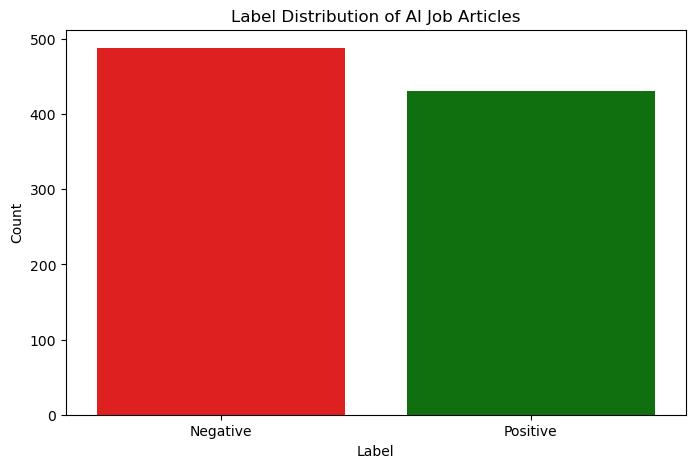

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = final_dataframe["Label"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette={"Positive": "green", "Negative": "red"})

plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Distribution of AI Job Articles")
plt.xticks(rotation=0)  

plt.show()

In [28]:
final_dataframe.head()

,content,Label
0,"Macomb, Detroit, Michigan-President Donald Tru...",Negative
1,Washington: US President Donald Trump and his ...,Negative
2,Associate head coach David Patrick and his LSU...,Positive
3,The New York Yankees officially have their ful...,Negative
4,Among the documents obtained by RNZ is a lette...,Negative


In [29]:
cols = ['Label'] + [col for col in final_dataframe.columns if col != 'Label']
final_dataframe = final_dataframe[cols]

In [30]:
final_dataframe.head()

,Label,content
0,Negative,"Macomb, Detroit, Michigan-President Donald Tru..."
1,Negative,Washington: US President Donald Trump and his ...
2,Positive,Associate head coach David Patrick and his LSU...
3,Negative,The New York Yankees officially have their ful...
4,Negative,Among the documents obtained by RNZ is a lette...


In [31]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    919 non-null    object
 1   content  919 non-null    object
dtypes: object(2)
memory usage: 14.5+ KB


In [32]:
# Save the final dataframe before labeling
final_dataframe.to_csv("/Users/lohithramesh/Desktop/M.S in Data Science/Semester 4/Text Mining/Project/Data/final_articles_after_labeling.csv", index=False)
print("The dataframe after labelling saved as 'final_articles_after_labeling.csv'")

The dataframe after labelling saved as 'final_articles_after_labeling.csv'
